In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys
from scipy import signal
# sys.path.insert(0, os.path.abspath('../posture_detector'))

In [3]:
from posture_detector.data import load_raw_data

In [4]:
!ls ../reader/data/


ls: cannot access '../reader/data/': No such file or directory


In [5]:
file_path = '../data/raw/datalog_at_2020-11-26_23_58_33.576158'
df = pd.read_csv(file_path, header=None)

/home/gabriel/dev/recommenders/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df = df.loc[:601207]

In [7]:
df[0] = pd.to_numeric(df[0], 'coerce')
df = df[df[0] < 1024]
# ?pd.to_numeric

In [8]:
df[1] = df[1].apply(lambda x: str(x).replace('\'', '').replace(' ',''))

In [9]:
set(df[1].unique())

{'', '-', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'}

In [10]:
degs = {
    '0': 'a', '5': 'b', '10': 'c', '20': 'd', '30': 'e',
    '45': 'f', '90': 'h'}
degs

{'0': 'a', '5': 'b', '10': 'c', '20': 'd', '30': 'e', '45': 'f', '90': 'h'}

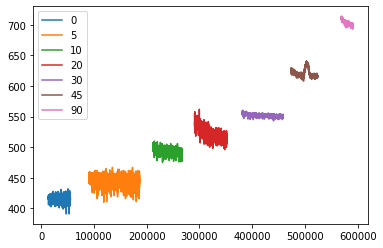

In [11]:
angles = degs.keys()
for d in angles:
    split = df[ df[1] == degs[d] ]
    plt.plot(split[0])
plt.legend(angles)
plt.show()

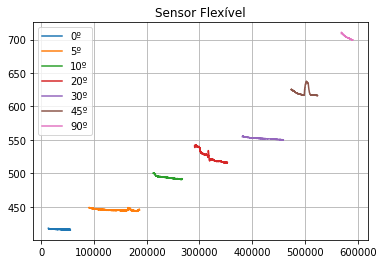

In [15]:
b, a = signal.butter(1, 0.01)

for d in angles:
    split = df[ df[1] == degs[d] ]
    split.loc[:, 0] = signal.filtfilt(b, a, split[0])
    plt.plot(split[0])
plt.legend(angles)
plt.grid()
plt.title('Sensor Flexível')
plt.legend([f'{a}º' for a in angles])
plt.show()

In [13]:
df[df[1] == 't'][0].mean()

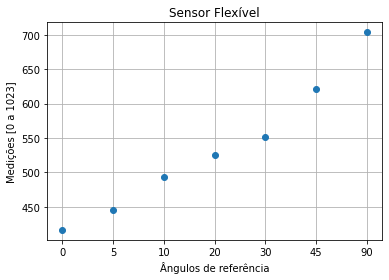

In [23]:
dot = []
for d in angles:
    split = df[ df[1] == degs[d] ]
    split.loc[:, 0] = signal.filtfilt(b, a, split[0])
    dot.append(split[0].mean())
plt.plot(angles, dot, 'o')
plt.grid()
plt.title('Sensor Flexível')
plt.ylabel('Medições [0 a 1023]')
plt.xlabel('Ângulos de referência')
plt.savefig('../images/angulos_vs_medida.png')
plt.show()